# `Компьютерное зрение`

## Работа с изображениями

Черно-белые изображения

In [20]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from PIL import Image

shape: (512, 512)
size: 262144
0 255


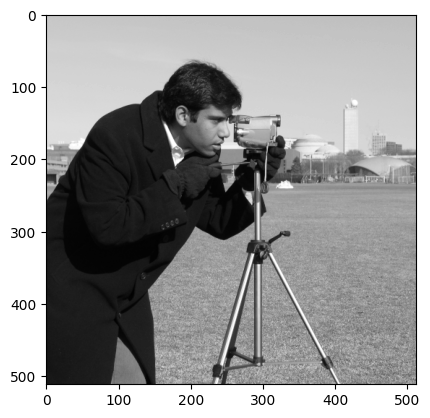

In [18]:
camera_img = data.camera()  # загружаем изображение
plt.imshow(camera_img, cmap='grey');  # выводим изображение
# cmap='grey' - чтобы изображение было ч/б (тк imshow() пытается преобразовать все изображения в цветной формат)
print(f'shape: {camera_img.shape}')  # размер картинки
print(f'size: {camera_img.size}')  # общее количество пикселей на картинке
print(camera_img.min(), camera_img.max())  # минимальное и максимальное значение пикселей (цвет)

In [35]:
camera_img[50, 50]  # пиксель на изображении

207

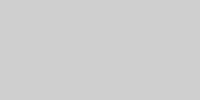

In [37]:
Image.new(mode='L', size=(200, 100), color=207)  # цвет этого пикселя 
# mode='L' - указывает, что это ч/б изображение
# color - номер цвета в палитре, на который мы хотим посмотреть

Цветные изображения

shape: (300, 451, 3)
size: 405900
0 231


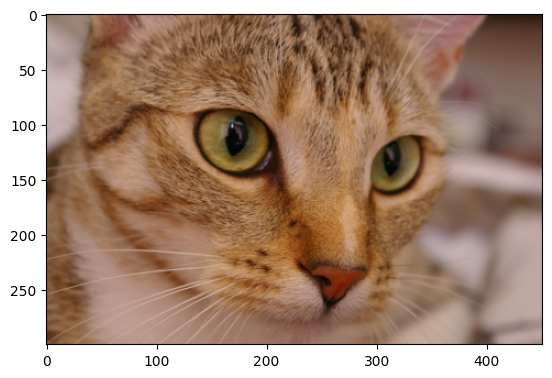

In [58]:
cat_img = data.chelsea()
plt.imshow(cat_img)
print(f'shape: {cat_img.shape}')  # размер картинки
print(f'size: {cat_img.size}')  # общее количество пикселей на картинке
print(cat_img.min(), cat_img.max())  # минимальное и максимальное значение пикселей (цвет)

In [41]:
cat_img[50, 50]  # тоже пиксель на изображении

array([138,  98,  63], dtype=uint8)

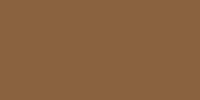

In [42]:
Image.new(mode='RGB', size=(200, 100), color=(138, 98, 63))

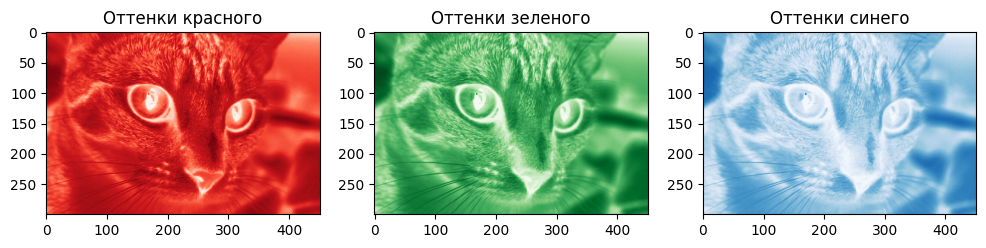

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))  # дает возможность выводить сразу несколько изображений
# тут будет 1 строка (1 парам.) и 3 столбца (2 парам.)

# сначала только красные оттенки, слой [0]
# также нужно принудительно задать cmap = 'Reds'
ax[0].imshow(cat_img[:,:,0], cmap = 'Reds')
ax[0].set_title('Оттенки красного')

# потом только зеленые, слой [1]
ax[1].imshow(cat_img[:,:,1], cmap = 'Greens')
ax[1].set_title('Оттенки зеленого')

# и наконец только синие, слой [2]
ax[2].imshow(cat_img[:,:,2], cmap = 'Blues')
ax[2].set_title('Оттенки синего');

Гистограмма

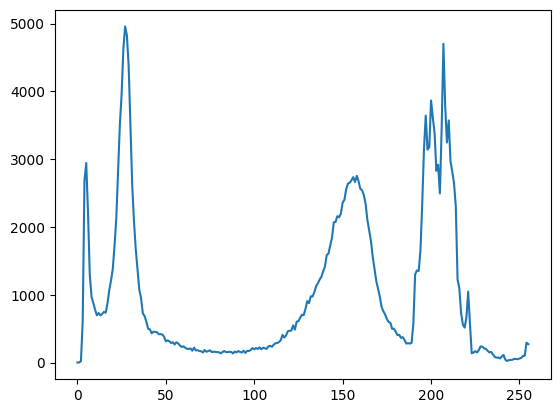

In [49]:
hist_gray = cv2.calcHist(images=[camera_img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])  # вывод гистограммы по ч/б изображению (по ОХ - цвета, по ОY - сколько раз встречается)
# images: само изображение [camera_img]
# channels: для ч/б фотографии это [0]
# mask: так как мы строим гистограмму всего изображения, то фильтр или срез (mask) равен None
# histSize: количество интервалов (bins) [256]
# ranges: диапазон оттенков [0,256]
plt.plot(hist_gray);

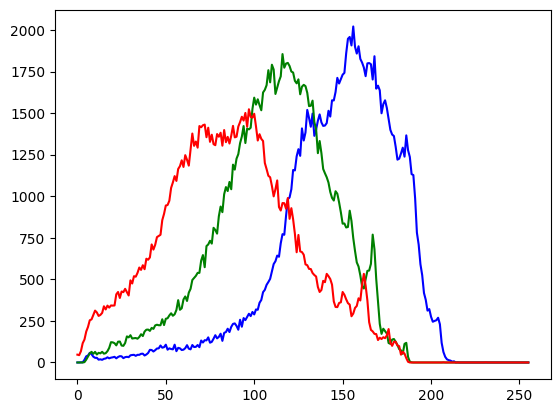

In [51]:
# цветной гистограмме мы передадим параметры в формате "синий, зеленый, красный"
color = ('b','g','r')

for channel, col in enumerate(color):
    hist_color = cv2.calcHist([cat_img], [channel], None, [256], [0, 256])
    plt.plot(hist_color, color = col)
    # строим на каждой итерации цикла по кривой и берем для нее цвет из color

### Обработка изображений

Вырезание фрагмента

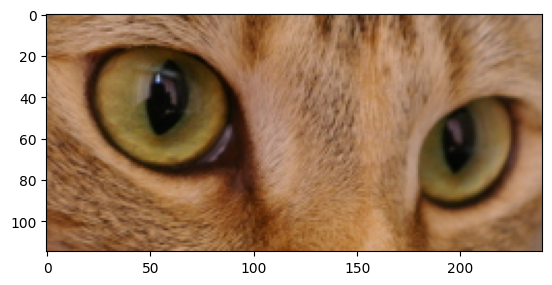

In [59]:
eyes = cat_img[70:185, 115:355]  # мы вырезали из всего изображения только нужную часть
plt.imshow(eyes);

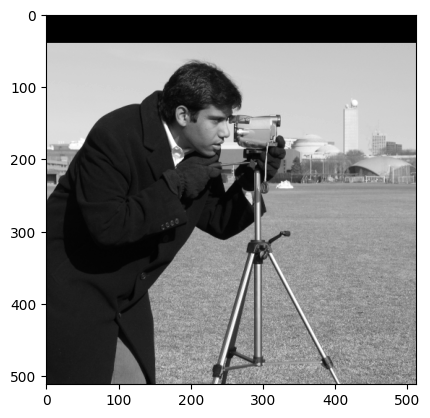

In [68]:
camera_img[:40] = 0  # на первых 40 пикселях сверху будет черная полоса
plt.imshow(camera_img, cmap='grey');

Преобразование цветного изображения в ч/б

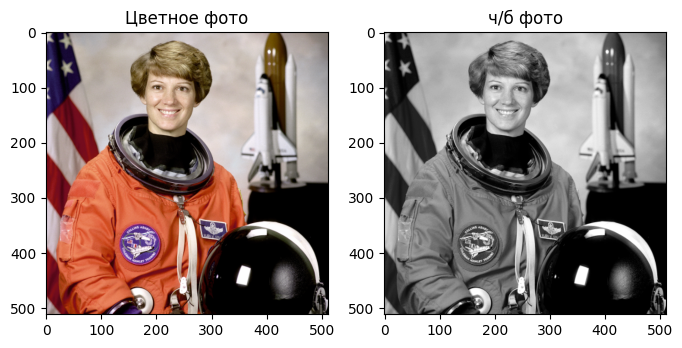

In [91]:
color_img = data.astronaut()
gray_img = rgb2gray(color_img)  # преобразуем цветное изображение в ч/б

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(color_img)
ax[0].set_title('Цветное фото')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('ч/б фото');

In [92]:
# 3 слоя цвета убрались, ушло одно измерение
print (color_img.shape, gray_img.shape)

(512, 512, 3) (512, 512)


Трансформации

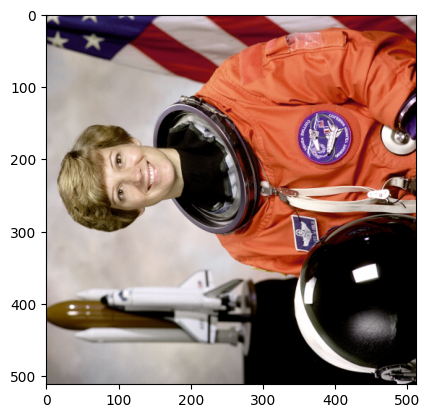

In [93]:
color_img = np.transpose(color_img, (1, 0, 2))  # повернули фото влево на 90 градусов
plt.imshow(color_img);

Пороговое преобразование

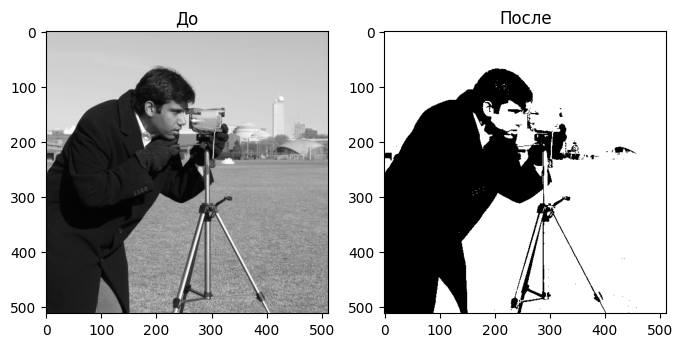

In [102]:
camera_img = data.camera()

binary = camera_img > 87  # все значения, которые больше 90, станут белыми, остальные - черными

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(camera_img, cmap='gray')
ax[0].set_title('До')

ax[1].imshow(binary, cmap='gray')
ax[1].set_title('После');

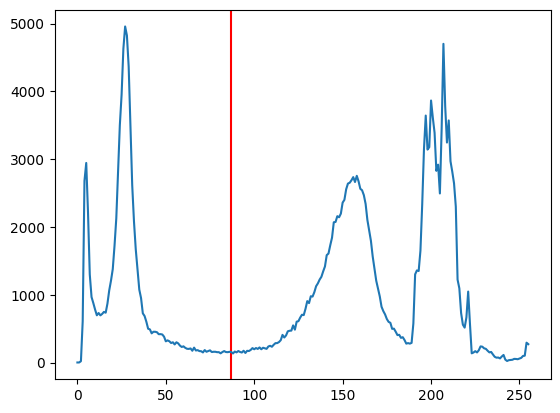

In [108]:
t_hist = cv2.calcHist([camera_img], [0], None, [256], [0, 256])

plt.axvline(87, c='r')  # пороговое значение для порогового преобразования
plt.plot(t_hist);

### Классификация изображений

Изучение данных

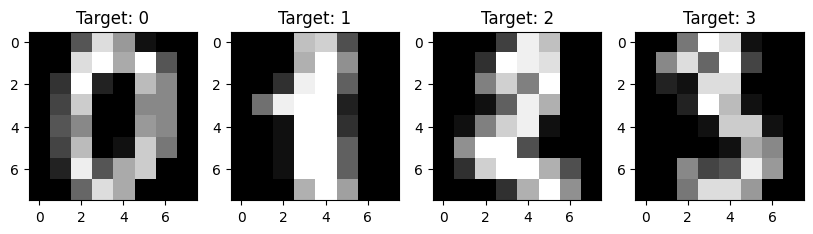

In [111]:
digits = datasets.load_digits()

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Target: {label}')

Подготовка данных

In [113]:
# превратим двумерную матрицу в одномерный массив (flatten the images)
# и превратим каждое изображение в одномерный массив, где строками будут изображения, а столбцами - их признаки (пиксели)

digits_t = digits.images.reshape(len(digits.images), -1)
digits_t[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [114]:
x_train, x_test, y_train, y_test = train_test_split(digits_t, digits.target, shuffle=True, random_state=42, test_size=0.3)

clf = svm.SVC().fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [115]:
# с помощью атрибута support_ мы можем посмотреть на индексы точек (изображений), которые использовались в качестве опорных векторов при обучении
clf.support_[:15]

array([ 79,  93, 126, 229, 325, 345, 402, 409, 428, 443, 455, 478, 485,
       582, 608])

In [116]:
# если применить индексы support_ к нашему датасету, то мы выберем только те изображения, которые использовал классификатор (их было 613)
digits_t[clf.support_].shape

(613, 64)

Оценка качества модели

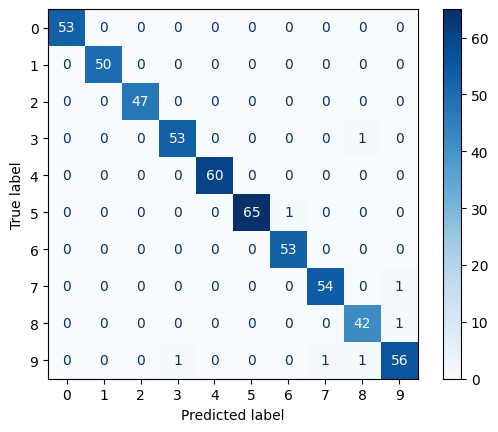

In [120]:
metrics.ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap = plt.cm.Blues);  # матрица запутанности

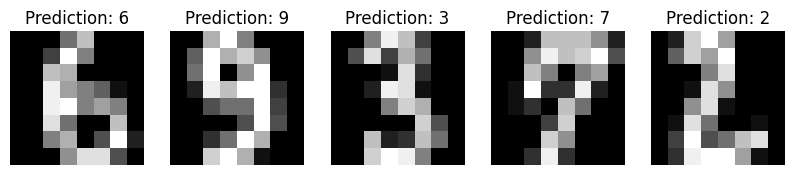

In [131]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for ax, image, pred in zip(axes, x_test, y_pred):
    ax.set_axis_off()  # убирает рамку вокруг изображений
    image = image.reshape(8, 8)  # кажде изображение надо вернуть в 2D формат

    ax.imshow(image, cmap='gray')
    ax.set_title(f'Prediction: {pred}')